In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv("ScrapeDataFromTiktok.csv")
df.head()

,Username,Comment,Target
0,ANDY TORAJA,tapi sy heran knp tdk dari awal di persoalkan ...,0
1,Juan Felix Michael,jelas2.... pemungutan ulang dan 02 didiskualif...,0
2,818anakrantau,trus apa fungsi dkpp ketika ada pelanggaran tp...,1
3,ArayamirShop,"Yakin Pemilu ulang, KPU sdh jadwalkan bulan Ju...",0
4,Faizi,02 Nyungsep,0


In [3]:
print(df.iloc[3, 1])

Yakin Pemilu ulang, KPU sdh jadwalkan bulan Juni utk pemilu ulang


In [4]:
df.shape

(536, 3)

Check Duplicate Data

In [5]:
duplicates = df[df.duplicated()]
print("Baris yang duplikat:")
print(len(duplicates))

Baris yang duplikat:
0


Pra-Proses

Case Folding

In [6]:
df['Comment'] = df['Comment'].str.casefold()

In [7]:
df.head()

,Username,Comment,Target
0,ANDY TORAJA,tapi sy heran knp tdk dari awal di persoalkan ...,0
1,Juan Felix Michael,jelas2.... pemungutan ulang dan 02 didiskualif...,0
2,818anakrantau,trus apa fungsi dkpp ketika ada pelanggaran tp...,1
3,ArayamirShop,"yakin pemilu ulang, kpu sdh jadwalkan bulan ju...",0
4,Faizi,02 nyungsep,0


In [8]:
print(df.iloc[3, 1])

yakin pemilu ulang, kpu sdh jadwalkan bulan juni utk pemilu ulang


Tokenizing

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer     = RegexpTokenizer(r'\w+')

# Tokenize the comments
df['Comment'] = df['Comment'].apply(lambda x: tokenizer.tokenize(x))

In [10]:
df.head()

,Username,Comment,Target
0,ANDY TORAJA,"[tapi, sy, heran, knp, tdk, dari, awal, di, pe...",0
1,Juan Felix Michael,"[jelas2, pemungutan, ulang, dan, 02, didiskual...",0
2,818anakrantau,"[trus, apa, fungsi, dkpp, ketika, ada, pelangg...",1
3,ArayamirShop,"[yakin, pemilu, ulang, kpu, sdh, jadwalkan, bu...",0
4,Faizi,"[02, nyungsep]",0


In [11]:
print(df.iloc[3, 1])

['yakin', 'pemilu', 'ulang', 'kpu', 'sdh', 'jadwalkan', 'bulan', 'juni', 'utk', 'pemilu', 'ulang']


Normalization

In [12]:
normalization_df = pd.read_csv("normalization_mappings.csv", encoding='ISO-8859-1')

normalization_dict = pd.Series(normalization_df['standard'].values, index=normalization_df['non_standard']).to_dict()

In [13]:
def normalize_tokens(tokens, norm_dict):
    return [norm_dict.get(token, token) for token in tokens]

df['Comment'] = df['Comment'].apply(lambda x: normalize_tokens(x, normalization_dict))

In [14]:
df.head()

,Username,Comment,Target
0,ANDY TORAJA,"[tapi, saya, heran, kenapa, tidak, dari, awal,...",0
1,Juan Felix Michael,"[jelas jelas, pemungutan, ulang, dan, 02, didi...",0
2,818anakrantau,"[terus, apa, fungsi, dkpp, ketika, ada, pelang...",1
3,ArayamirShop,"[yakin, pemilihan umum, ulang, komisi pemeliha...",0
4,Faizi,"[02, nyungsep]",0


In [15]:
print(df.iloc[3, 1])

['yakin', 'pemilihan umum', 'ulang', 'komisi pemelihan umum', 'sudah', 'jadwalkan', 'bulan', 'juni', 'untuk', 'pemilihan umum', 'ulang']


Remove Stopwords

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [18]:
def remove_stopwords(tokens, stop_words):
    return [token for token in tokens if token not in stop_words]

df['Comment'] = df['Comment'].apply(lambda x: remove_stopwords(x, stop_words))

In [19]:
df.head()

,Username,Comment,Target
0,ANDY TORAJA,"[heran, persoalkan, prabowo, gibran, lmbt, mnd...",0
1,Juan Felix Michael,"[jelas jelas, pemungutan, ulang, 02, didiskual...",0
2,818anakrantau,"[fungsi, dkpp, pelanggaran, sanksi, sebatas, t...",1
3,ArayamirShop,"[pemilihan umum, ulang, komisi pemelihan umum,...",0
4,Faizi,"[02, nyungsep]",0


In [20]:
print(df.iloc[3, 1])

['pemilihan umum', 'ulang', 'komisi pemelihan umum', 'jadwalkan', 'juni', 'pemilihan umum', 'ulang']


Stemming

In [21]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem tokens
def stem_tokens(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming
df['Comment'] = df['Comment'].apply(lambda x: stem_tokens(x, stemmer))

In [22]:
df.head()

,Username,Comment,Target
0,ANDY TORAJA,"[heran, soal, prabowo, gibran, lmbt, mndaftar,...",0
1,Juan Felix Michael,"[jelas jelas, mungut, ulang, 02, diskualifikasi]",0
2,818anakrantau,"[fungsi, dkpp, langgar, sanksi, batas, tegur]",1
3,ArayamirShop,"[pilih umum, ulang, komisi pemelihan umum, jad...",0
4,Faizi,"[02, nyungsep]",0


In [23]:
print(df.iloc[3, 1])


['pilih umum', 'ulang', 'komisi pemelihan umum', 'jadwal', 'juni', 'pilih umum', 'ulang']


TF-IDF (Term Frequency-Inverse Document Frequency)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

stemmed_texts = [' '.join(tokens) for tokens in df['Comment']]

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(stemmed_texts)

# Menampilkan hasil
print("Matriks TF-IDF:")
print(X_tfidf.toarray())

Matriks TF-IDF:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.23253575 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [25]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

df = pd.concat([df.drop(columns=['Comment']), tfidf_df], axis=1)

In [26]:
df.head()

,Username,Target,000,01,02,03,10,100,10tahun,11,...,wkwk,ya,yaman,yesss,yohanes,youtube,yuk,yukzz,yusril,zalim
0,ANDY TORAJA,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Juan Felix Michael,0,0.0,0.0,0.232536,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,818anakrantau,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ArayamirShop,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Faizi,0,0.0,0.0,0.481548,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.shape

(536, 1236)

Menghapus kolom Username

In [28]:
df = df.drop(columns=['Username'])

In [29]:
df.head()

,Target,000,01,02,03,10,100,10tahun,11,13,...,wkwk,ya,yaman,yesss,yohanes,youtube,yuk,yukzz,yusril,zalim
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.232536,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.481548,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Melihat distribusi kelas pada kolom 'Target'

In [30]:
class_distribution = df['Target'].value_counts()

print(class_distribution)

Target
1    275
0    261
Name: count, dtype: int64


In [31]:
X = df.drop(columns=['Target'])
y = df['Target']

In [32]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [33]:
splits = {
    '60:40': split_data(X, y, 0.4),
    '70:30': split_data(X, y, 0.3),
    '80:20': split_data(X, y, 0.2)
}

In [34]:
# Parameter grid untuk model yang berbeda
param_grid_rf = {'n_estimators': [50, 100, 200]}
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_nb = {}

# Fungsi untuk melakukan Grid Search
def perform_grid_search(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid.best_estimator_

# Grid Search untuk setiap rasio split
best_models = {}

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"Performing Grid Search for split ratio: {ratio}")

    # Random Forest
    rf_model = perform_grid_search(RandomForestClassifier(), param_grid_rf, X_train, y_train)
    best_models[f'RandomForest_{ratio}'] = rf_model

    # Logistic Regression
    lr_model = perform_grid_search(LogisticRegression(max_iter=1000), param_grid_lr, X_train, y_train)
    best_models[f'LogisticRegression_{ratio}'] = lr_model

    # SVM
    svm_model = perform_grid_search(SVC(probability=True), param_grid_svm, X_train, y_train)
    best_models[f'SVM_{ratio}'] = svm_model

    # Naïve Bayes (tidak ada parameter yang perlu di-tuning)
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    best_models[f'NaiveBayes_{ratio}'] = nb_model

Performing Grid Search for split ratio: 60:40
Performing Grid Search for split ratio: 70:30
Performing Grid Search for split ratio: 80:20


In [35]:
best_models

{'RandomForest_60:40': RandomForestClassifier(n_estimators=50),
 'LogisticRegression_60:40': LogisticRegression(C=1, max_iter=1000),
 'SVM_60:40': SVC(C=1, probability=True),
 'NaiveBayes_60:40': GaussianNB(),
 'RandomForest_70:30': RandomForestClassifier(),
 'LogisticRegression_70:30': LogisticRegression(C=10, max_iter=1000),
 'SVM_70:30': SVC(C=1, kernel='linear', probability=True),
 'NaiveBayes_70:30': GaussianNB(),
 'RandomForest_80:20': RandomForestClassifier(),
 'LogisticRegression_80:20': LogisticRegression(C=1, max_iter=1000),
 'SVM_80:20': SVC(C=1, probability=True),
 'NaiveBayes_80:20': GaussianNB()}

In [36]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    X_test_np = X_test.values
    X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))
    
    for model_name, model in best_models.items():
        if ratio in model_name:
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

            # Hitung metrik evaluasi
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba)

            # Simpan hasil evaluasi
            evaluation_results[f'{model_name}_{ratio}'] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc
            }


In [37]:
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

RandomForest_60:40_60:40:
  accuracy: 0.6372
  precision: 0.6526
  recall: 0.5794
  f1: 0.6139
  auc: 0.6848
LogisticRegression_60:40_60:40:
  accuracy: 0.6512
  precision: 0.6143
  recall: 0.8037
  f1: 0.6964
  auc: 0.7156
SVM_60:40_60:40:
  accuracy: 0.6419
  precision: 0.6056
  recall: 0.8037
  f1: 0.6908
  auc: 0.7160
NaiveBayes_60:40_60:40:
  accuracy: 0.6093
  precision: 0.6162
  recall: 0.5701
  f1: 0.5922
  auc: 0.6155
RandomForest_70:30_70:30:
  accuracy: 0.6646
  precision: 0.6571
  recall: 0.6053
  f1: 0.6301
  auc: 0.7231
LogisticRegression_70:30_70:30:
  accuracy: 0.6087
  precision: 0.5644
  recall: 0.7500
  f1: 0.6441
  auc: 0.7003
SVM_70:30_70:30:
  accuracy: 0.6211
  precision: 0.5773
  recall: 0.7368
  f1: 0.6474
  auc: 0.7116
NaiveBayes_70:30_70:30:
  accuracy: 0.5963
  precision: 0.5797
  recall: 0.5263
  f1: 0.5517
  auc: 0.5926
RandomForest_80:20_80:20:
  accuracy: 0.6481
  precision: 0.6410
  recall: 0.5102
  f1: 0.5682
  auc: 0.7186
LogisticRegression_80:20_80:2

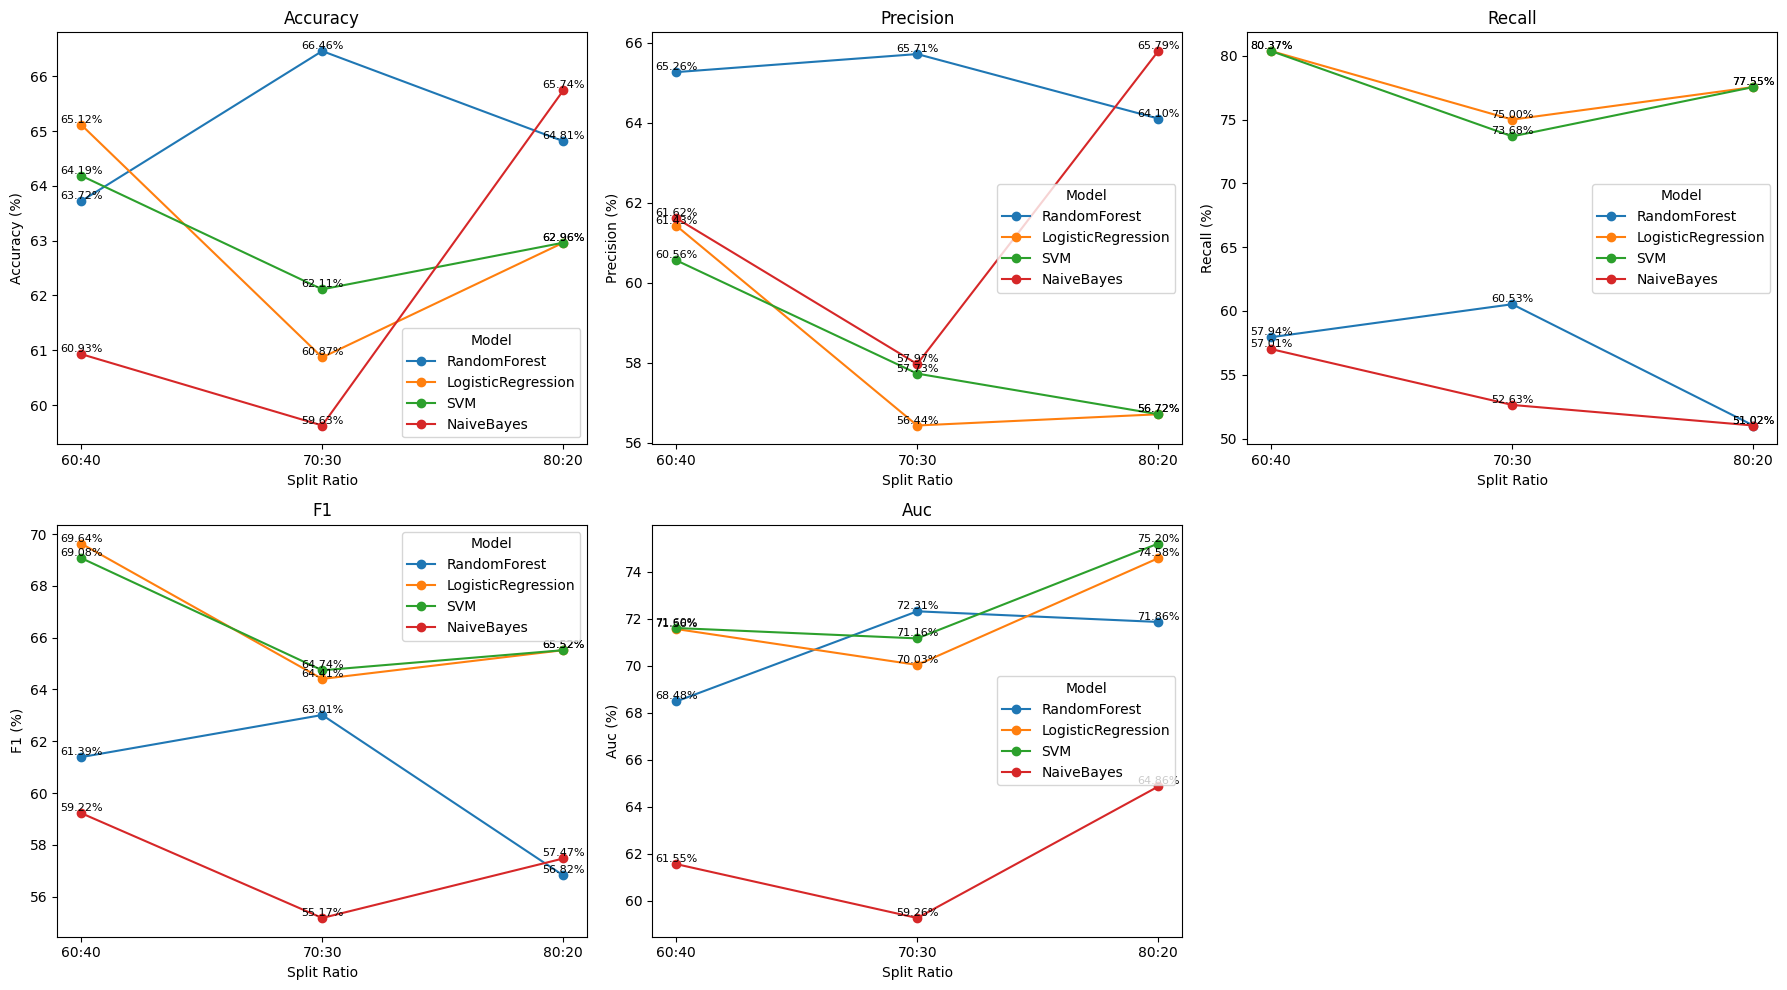

In [39]:
df_results = pd.DataFrame(evaluation_results).T

# Extract split ratios and models
df_results['Split Ratio'] = df_results.index.str.split('_').str[-1]
df_results['Model'] = df_results.index.str.split('_').str[0]

# Plotting the evaluation metrics using line chart
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    for model in df_results['Model'].unique():
        data = df_results[df_results['Model'] == model]
        ax.plot(data['Split Ratio'], data[metric] * 100, marker='o', label=model)  # Convert to percentage
        for idx, value in enumerate(data[metric] * 100):  # Convert to percentage
            ax.text(idx, value, f"{value:.2f}%", ha='center', va='bottom', fontsize=8)
    ax.set_title(metric.capitalize())
    ax.set_ylabel(f"{metric.capitalize()} (%)")
    ax.set_xlabel('Split Ratio')
    ax.legend(title='Model')

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()